<a href="https://colab.research.google.com/github/Krasovskiy-creator/Text-Analyzer/blob/main/Checker_Keywords_Count.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install requests
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt


In [17]:
#@title Enter URLs to rip headers from
URL_1 = "https://businessclassexperts.com/best-business-class-flights-to-europe/" #@param {type:"string"}
URL_2 = "https://thepointsguy.com/news/europe-business-class-deal/" #@param {type:"string"}
URL_3 = "https://www.travelguzs.com/business-class-offers/cheap-business-class-tickets-to-europe" #@param {type:"string"}
URL_4 = "https://cheapfirstclass.com/cheap-first-class-business-class-flights-europe/" #@param {type:"string"}
URL_5 = "https://www.fly4free.com/flight-deals/business-class/" #@param {type:"string"}
URL_6 = "https://thriftytraveler.com/deals/airlines/cheap-business-class-fares-to-europe/" #@param {type:"string"}
URL_7 = "https://www.asaptickets.com/business-class/europe" #@param {type:"string"}
URL_8 = "https://www.nerdwallet.com/article/travel/cheapest-business-class-awards-to-europe" #@param {type:"string"}
URL_9 = "https://voyagu.com/" #@param {type:"string"}
URL_10 = "https://businessclassconsolidator.com/" #@param {type:"string"}

# Очищаем список от пустых значений
rawList = [URL_1, URL_2, URL_3, URL_4, URL_5, URL_6, URL_7, URL_8, URL_9, URL_10]
urlList = list(filter(None, rawList))

In [18]:
#@title Enter search keywords
keyword_1 = "business class flights" #@param {type:"string"}
keyword_2 = "First flights" #@param {type:"string"}
keyword_3 = "book flight" #@param {type:"string"}
keyword_4 = "business class" #@param {type:"string"}
keyword_5 = "cheep" #@param {type:"string"}

# Очищаем список от пустых значений
rawList = [keyword_1, keyword_2, keyword_3, keyword_4, keyword_5]
keywordList = list(filter(None, rawList))

In [19]:


# Очищаем список от пустых значений
rawList = [URL_1, URL_2, URL_3, URL_4, URL_5, URL_6, URL_7, URL_8, URL_9, URL_10]
urlList = list(filter(None, rawList))

# Очищаем список от пустых значений
rawList = [keyword_1, keyword_2, keyword_3, keyword_4, keyword_5]
keywordList = list(filter(None, rawList))

# Создаем пустой DataFrame для хранения результатов
df = pd.DataFrame(columns=['URL', 'Keyword', 'Location', 'Count'])

# Проверяем каждый URL в списке
for url in urlList:
    # Отправляем GET запрос к URL и получаем содержимое страницы
    response = requests.get(url)
    content = response.text

    # Парсим содержимое страницы с помощью BeautifulSoup
    soup = BeautifulSoup(content, 'html.parser')

    # Проверяем каждое ключевое слово в списке
    for keyword in keywordList:
        # Ищем все вхождения ключевого слова в тексте страницы
        count = content.count(keyword)

        # Добавляем информацию о месте, где было найдено ключевое слово
        results = []
        results.append(url)
        results.append(keyword)
        if count > 0:
            if soup.title and keyword in soup.title.text.lower():
                results.append('Title')
            elif soup.find('meta', attrs={'name': 'description'}) and keyword in soup.find('meta', attrs={'name': 'description'})['content'].lower():
                results.append('Description')
            elif soup.find('h1') and keyword in soup.find('h1').text.lower():
                results.append('H1')
            elif soup.find('h2') and keyword in soup.find('h2').text.lower():
                results.append('H2')
            elif soup.find('h3') and keyword in soup.find('h3').text.lower():
                results.append('H3')
            elif keyword in content.lower():
                results.append('Content')
            else:
                results.append('N/A')
        else:
            results.append('N/A')
        results.append(count)

        # Добавляем результаты по текущему ключевому слову в список
        df.loc[len(df)] = results






In [22]:
# Выводим результаты
(df)

,URL,Keyword,Location,Count
0,https://businessclassexperts.com/best-business...,business class flights,N/A,0
1,https://businessclassexperts.com/best-business...,First flights,N/A,0
2,https://businessclassexperts.com/best-business...,book flight,N/A,0
3,https://businessclassexperts.com/best-business...,business class,Title,13
4,https://businessclassexperts.com/best-business...,cheep,N/A,0
5,https://thepointsguy.com/news/europe-business-...,business class flights,N/A,0
6,https://thepointsguy.com/news/europe-business-...,First flights,N/A,0
7,https://thepointsguy.com/news/europe-business-...,book flight,N/A,0
8,https://thepointsguy.com/news/europe-business-...,business class,Content,10
9,https://thepointsguy.com/news/europe-business-...,cheep,N/A,0


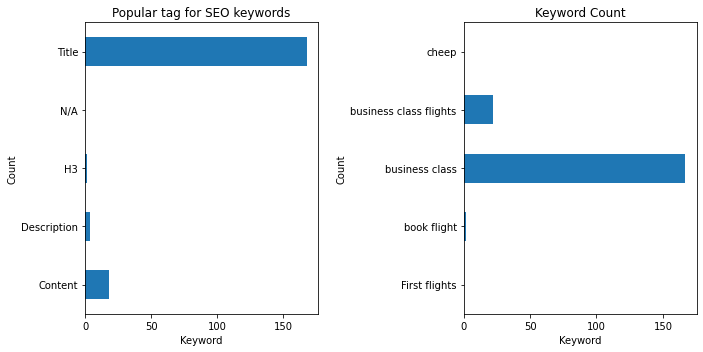

In [33]:
# Выводим график
# Создаем графический контейнер с двумя рядами и одной колонкой
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Выводим первый график
df.groupby('Location')['Count'].sum().plot(kind='barh', ax=axs[0])
axs[0].set_title('Popular tag for SEO keywords')
axs[0].set_xlabel('Keyword')
axs[0].set_ylabel('Count')

# Выводим второй график
df.groupby('Keyword')['Count'].sum().plot(kind='barh', ax=axs[1])
axs[1].set_title('Keyword Count')
axs[1].set_xlabel('Keyword')
axs[1].set_ylabel('Count')

# Отображаем графики
plt.tight_layout()
plt.show()

In [21]:
# # Сохраняем результаты в файл CSV
# df.to_csv('results.csv', index=False)